#### K-Means Clustering - Finding K using Elbow Method

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [8]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
num_vars = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
data_in = data[num_vars]
data_in.shape, data.shape

((150, 4), (150, 5))

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data_in)
X.shape

(150, 4)

In [15]:
wcss_list = []
for k in range(1, 10): 
    model = KMeans(n_clusters=k, random_state=12)
    model.fit(X)
    wcss_list.append(model.inertia_)

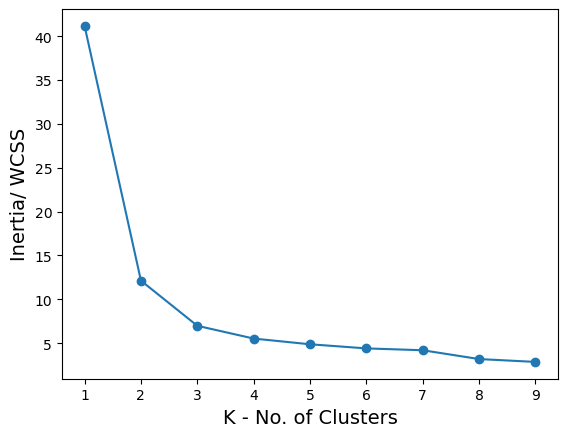

In [17]:
fig, ax = plt.subplots()
ax.plot(range(1,10), wcss_list, marker='o')
ax.set_xlabel("K - No. of Clusters", size=14)
ax.set_ylabel("Inertia/ WCSS", size=14)
plt.show()

In [18]:
model = KMeans(n_clusters=3, random_state=12)
model.fit(X)
data_in["cluster_label"] = model.predict(X)

In [19]:
data_in["cluster_label"].value_counts()

cluster_label
2    61
0    50
1    39
Name: count, dtype: int64

In [20]:
data_in.groupby(['cluster_label']).mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster_label,,,,
0,5.006000,3.428000,1.462000,0.246000
1,6.846154,3.082051,5.702564,2.079487
2,5.888525,2.737705,4.396721,1.418033
